In [1]:
from microsim import schema as ms
from microsim.schema.optical_config import lib
from microsim.util import ortho_plot

sample1 = ms.Sample(
    labels=[
        ms.FluorophoreDistribution(
            distribution=ms.CosemLabel(dataset="jrc_hela-3", label="ne_pred"),
            fluorophore="mTagBFP2",
        ),
        ms.FluorophoreDistribution(
            distribution=ms.CosemLabel(dataset="jrc_hela-3", label="er-mem_pred"),
            fluorophore="EGFP",
        ),
        ms.FluorophoreDistribution(
            distribution=ms.CosemLabel(dataset="jrc_hela-3", label="mito-mem_pred"),
            fluorophore="mScarlet",
        ),
    ]
)
sample2 = ms.Sample(
    labels=[
        ms.FluorophoreDistribution(
            distribution=ms.CosemLabel(dataset="jrc_macrophage-2", label="lyso_pred"),
            fluorophore="mTagBFP2",
        ),
        ms.FluorophoreDistribution(
            distribution=ms.CosemLabel(dataset="jrc_macrophage-2", label="er_pred"),
            fluorophore="EGFP",
        ),
        ms.FluorophoreDistribution(
            distribution=ms.CosemLabel(dataset="jrc_macrophage-2", label="mito_pred"),
            fluorophore="mScarlet",
        ),
    ]
)

In [2]:
sim = ms.Simulation(
    truth_space=ms.ShapeScaleSpace(shape=(52, 512, 512), scale=(0.064, 0.064, 0.064)),
    output_space={"downscale": 2},
    samples=[sample1, sample2],
    channels=[lib.DAPI, lib.FITC, lib.DSRED],
    modality=ms.Confocal(pinhole_au=2),
    detector=ms.CameraCCD(qe=0.82, read_noise=6),
    output_path="h2-cf.tif",
    settings=ms.Settings(max_psf_radius_aus=2),
)

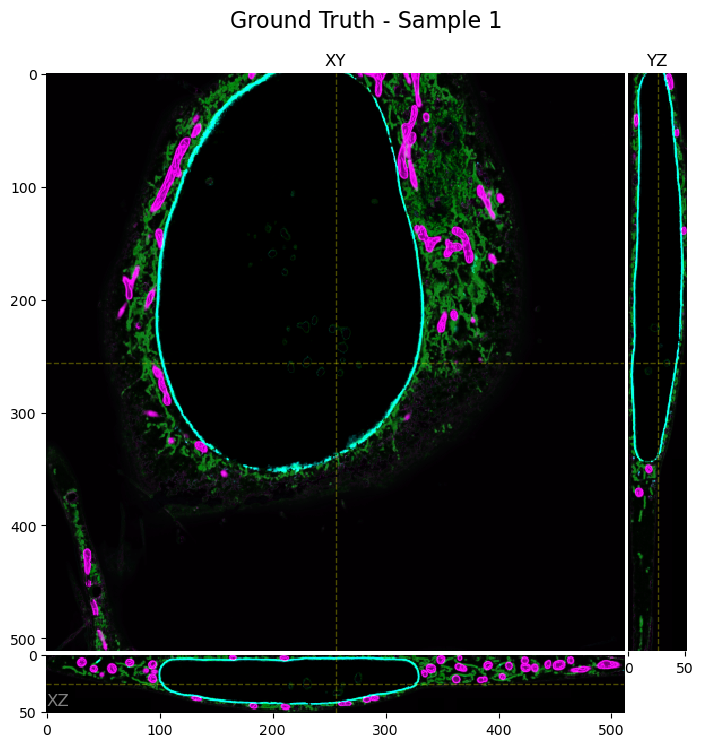

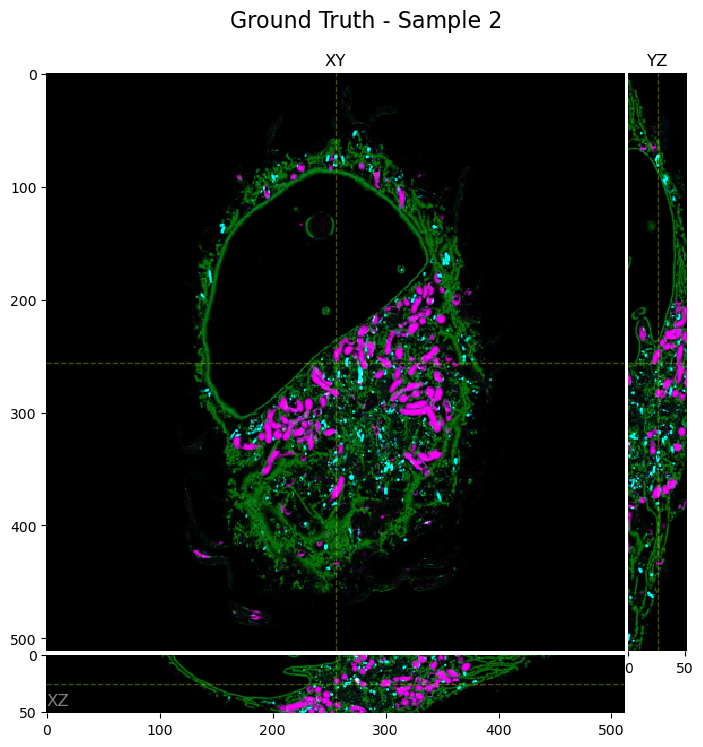

In [3]:
ground_truth = sim.ground_truth()
ortho_plot(
    ground_truth[0], title="Ground Truth - Sample 1", cmap=["cyan", "green", "magenta"]
)
ortho_plot(
    ground_truth[1], title="Ground Truth - Sample 2", cmap=["cyan", "green", "magenta"]
)

INFO:root:Rendering channel DAPI -----------------
INFO:root:>> fluor mTagBFP2
INFO:root:>>>> PSF @ 461.1nm (x19.84)
INFO:root:Using cached PSF: /home/federico.carrara/.cache/microsim/psf/_1-515_1-515_170-0_170-0_1-515_1-515_1-0_1-4_1-47_150-0/52_513_0-064_0-064_0-46114216735985525_0-46114216735985525_2-0.npy
INFO:root:>> fluor EGFP
INFO:root:>>>> PSF @ 479.9nm (x0.14)
INFO:root:Using cached PSF: /home/federico.carrara/.cache/microsim/psf/_1-515_1-515_170-0_170-0_1-515_1-515_1-0_1-4_1-47_150-0/52_513_0-064_0-064_0-47992054229272113_0-47992054229272113_2-0.npy
INFO:root:>> fluor mScarlet
INFO:root:Rendering channel FITC -----------------
INFO:root:>> fluor mTagBFP2
INFO:root:>>>> PSF @ 518.0nm (x0.01)
INFO:root:Using cached PSF: /home/federico.carrara/.cache/microsim/psf/_1-515_1-515_170-0_170-0_1-515_1-515_1-0_1-4_1-47_150-0/52_513_0-064_0-064_0-5179856773508832_0-5179856773508832_2-0.npy
INFO:root:>> fluor EGFP
INFO:root:>>>> PSF @ 520.1nm (x134.90)
INFO:root:Using cached PSF: /home/f

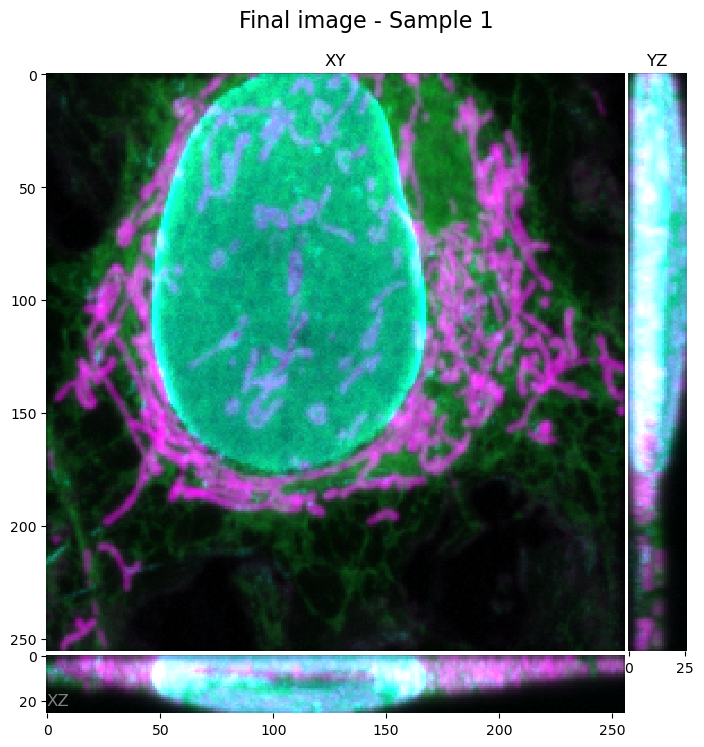

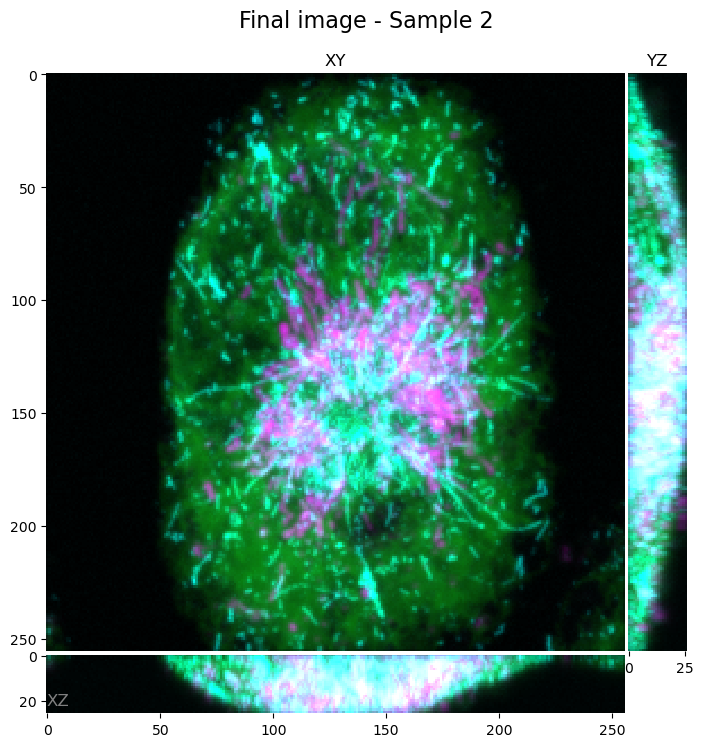

In [4]:
final = sim.run()
ortho_plot(
    final[0],
    title="Final image - Sample 1",
    cmap=["cyan", "green", "magenta"],
    mip=True,
)
ortho_plot(
    final[1],
    title="Final image - Sample 2",
    cmap=["cyan", "green", "magenta"],
    mip=True,
)